# Notebook Setup

In [97]:
from sympy import Symbol, symbols, Eq, solve, nsolve, solveset, limit, oo
import mpmath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
%precision 6
pd.options.display.float_format = '{:,.6f}'.format
plt.style.use('dark_background')

---

# Quantitative Methods I

## Study Session 1 - Quantitative Methods 1

### Reading 1 - The Time Value of Money

Learning outcomes
e. "...(PV only)...": An infinite series of cash flows has no future value; for if they did, when?

#### Interest Rates
"In this section, we briefly explain the meaning and <u><i>interpretation</i></u>...": As a contextual meaning.

"2 Technically, 1 plus the nominal rate equals...": This identity in mathematical notation:
$$
1 + TheNominalRate = (1 + TheRealRate) \cdot (1 + TheInflationRate)
$$
and this is to be invistigated later on.

Findings: This equation is named __The Fischer Equation__ after the economist Fischer.
The rationale relates roughly to the purchasing power of a unit of currency. To be futher analysed. 

Translating equation 2 to a Python function for use in the following examples, noting that the equation is
$$
FV_N = PV(1 + r)^N
$$

In [99]:
def FV_N(PV, r, N):
    return PV * (1 + r)**N

##### Solution to Example 1


In [100]:
PV, r, N = 5e6, .07, 5

$FV_N = $

In [101]:
FV_N(PV, r, N)

7012758.653500

##### Solution to Example 2

In [102]:
PV, r, N = 2.5e6, 0.08, 6

$FV_N = $

In [103]:
FV_N(PV, r, N)

3967185.807360

##### Solution to Example 3

In [104]:
PV, r, N = 10e6, 0.09, 15 - 5

$FV_N = $

In [105]:
FV_N(PV, r, N)

23673636.745921

#### Non-Annual Compounding (Future Value)

Translating equation 2 to a Python function for use in the following examples, noting that the equation is
$$
FV_N = PV(1 + \frac{r_s}{m})^{mN}
$$

In [106]:
def FV_N_m(PV, r_s, m, N):
    return FV_N(PV, r_s/m, m*N)

##### Solution to Example 1

In [107]:
FV_N_m(10_000, 0.08, 4, 2)

11716.593810

##### Solution to Example 2

In [108]:
FV_N_m(1_000_000, 0.06, 12, 1)

1061677.811864

#### Continuous Compounding, Stated and Effictive Rates

Equation 4:
$$
FV_N = PV e^{r_s N}
$$

Defining the right-hand-side of equation 4 as a Python function:

In [109]:
def FV_N_c(PV, r_s, N):
   return PV * np.e**(r_s*N) 

##### Solution to Example 6

In [110]:
FV_N_c(10_000, 0.08, 2)

11735.108710

##### Stated and Effective Rates

For an insight into the difference between different compounding frequencies we replicate table 1 below
then we plot a graph to compare the effects of those frequencies assuming other variables fixed.

In [111]:
# Replicate Table 1
frequencies = [1, 2, 4, 12, 356, oo]
table_1 = pd.DataFrame(
    {
        "Frequency": ["Annual", "Semiannual", "Quarterly", "Monthly", "Daily", "Continuous"],
        "r_s/m": [0.08/f for f in frequencies],
        "mN": [f * 1 for f in frequencies]
    },
   dtype=float 
)
table_1

/tmp/ipykernel_5832/2132860787.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  table_1 = pd.DataFrame(


,Frequency,r_s/m,mN
0,Annual,0.080000,1.000000
1,Semiannual,0.040000,2.000000
2,Quarterly,0.020000,4.000000
3,Monthly,0.006667,12.000000
4,Daily,0.000225,356.000000
5,Continuous,0.000000,inf


In [112]:
def FV_generic(PV, r_s, m, N):
    _m = Symbol('_m')
    return PV * limit((1 + r_s/_m)**(_m*N), _m, m).evalf()

table_1['Futrue Value of $1'] = table_1.apply(lambda row: FV_generic(1, 0.08, row['mN'], 1), axis=1).astype(float)
table_1

,Frequency,r_s/m,mN,Futrue Value of $1
0,Annual,0.080000,1.000000,1.080000
1,Semiannual,0.040000,2.000000,1.081600
2,Quarterly,0.020000,4.000000,1.082432
3,Monthly,0.006667,12.000000,1.083000
4,Daily,0.000225,356.000000,1.083277
5,Continuous,0.000000,inf,1.083287


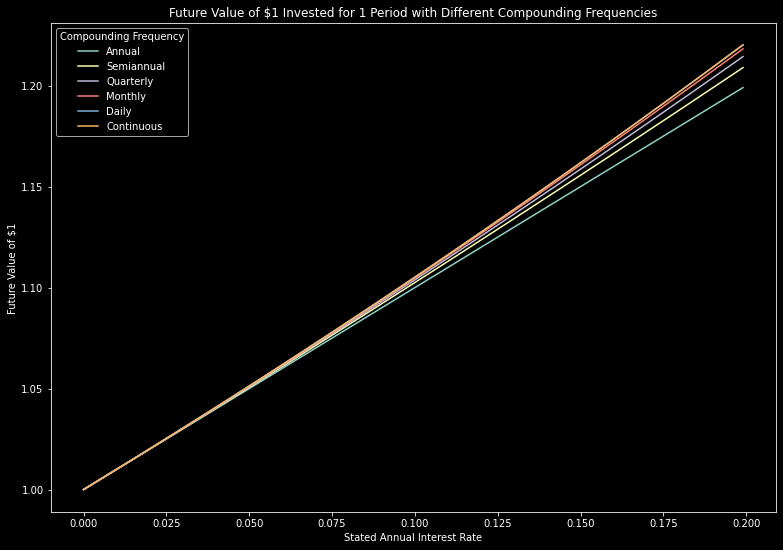

In [113]:
rates = np.arange(0, 0.2, .001)

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot()

frequencies = {'Annual': 1, 'Semiannual': 2, 'Quarterly': 4, 'Monthly': 12, 'Daily': 365, 'Continuous': oo}
for f in frequencies:
    ax.plot(rates, np.vectorize(FV_generic)(1, rates, frequencies[f], 1), label=f)

ax.set_title('Future Value of $1 Invested for 1 Period with Different Compounding Frequencies', )
ax.set_xlabel('Stated Annual Interest Rate')
ax.set_ylabel('Future Value of $1')
ax.legend()
ax.legend(title='Compounding Frequency')

plt.show()

---

We here encode a few imporant identies for future reference.

$$
EAR = (1 + \frac{r_s}{m})^m - 1
$$
where $EAR$ is the __Effictive Annual Rate__, $r_s$ is the __Stated Annual Rate__, and $m$ is the frequency  
of compounding per annum.

In the case of continuous compounding:
$$
EAR = e^{r_s} - 1
$$
where $e$ is Euler's number, and $r_s$ is as the previous equation.

To find the __stated annual interest rate__ from the previous equation, given the $EAR$, we proceed as follows:

$$ EAR + 1 = e^{r_s} $$
$$ \ln{(EAR + 1)} = \ln{e^{r_s}} $$
$$ \ln{(EAR + 1)} = r_s $$

We define the matching Python functions here for future use:

In [189]:
def EAR(r_s, m):
    return (1 + r_s/m)**m - 1

def EAR_c(r_s):
    return np.e**r_s - 1

#### Future Value Of A Series Of Cash Flows, Future Value Annuities

##### Equal Cash Flows - Ordinary Annuities

To find the future value of an ordinary annuity, it may be calculated as follows:
$$
FV_N = A\bigg[\frac{(1 + r)^{N} - 1}{r}\bigg]
$$
where $FV_N$ is the future value of an ordinary annuity of amount $A$ invested at rate $r$ for $N$ periods.

##### Solution to Example 7

Translating the FV function for ordinary annuities to a python function:

In [114]:
def FV_annuity(A, r, N=1):
    """
    We assume A is an ordinary annuity.
    """
    return  A * ((1 + r)**N - 1) / r

In [115]:
FV_annuity(20_000, 0.09, 30)

2726150.770918

#### 6.2 Unequal Cash Flows

Translating Table 2 to Python code:

In [116]:
table_2 = pd.DataFrame(
    {
        'Cash Flows ($)': [1_000, 2_000, 4_000, 5_000, 6_000]
    },
    index=list(range(1, 6))
)
table_2.index.name = 'Time'
table_2

,Cash Flows ($)
Time,
1,1000
2,2000
3,4000
4,5000
5,6000


In [117]:
table_2['Future Value at Year 5'] = table_2.apply(lambda row: FV_N(row['Cash Flows ($)'], 0.05, 5 - row.name), axis=1)
table_2

,Cash Flows ($),Future Value at Year 5
Time,,
1,1000,"1,215.506250"
2,2000,"2,315.250000"
3,4000,"4,410.000000"
4,5000,"5,250.000000"
5,6000,"6,000.000000"


#### 7 Present Value of a Single Cash Flow (Lump Sum)

Equation 8, inferred directly from equation 2 is
$$
PV = FV_N (1 + r)^N
$$
where the variables are the same in equation 2.

We also notice that, if the future value of a principal of present value $PV$ invested at an annual rate $r$ for $N$ periods  
is reprsented as a function $FV_N(PV, r, N) = PV(1 + r)^N$ of the three variables, we can represent the present value as  
$PV = FV_N(PV, r, -N)$ (which will lead us to naturally define a Python function to calcualte the present value discussed in  
terms of a previously defined function for the future value of a single payment).

In [118]:
def PV(_FV_N, r, N):
    return FV_N(_FV_N, r, -N)

##### Solution to Example 8

In [119]:
PV(100_000, 0.08, 6)

63016.962688

##### Solution to Example 9

In [120]:
PV(100_000, 0.08, 10 - 4)

63016.962688

#### 8 Non-Annual Compounding (Present Value)

As earlier in core reading 7, the formula and Python function for the present value of an amount of future value $FV_N$  
invested at interest $r$ compounding $m$ thly, respectivly, are
$$
PV = FV_N\left(1 + \frac{r_s}{m}\right)^{-mN}
$$

In [121]:
def PV_N_m(_FV_N, r_s, m, N):
    return PV(_FV_N, r_s/m, m*N)

##### Solution to Example 5

In [122]:
PV_N_m(5_000_000, 0.06, 12, 10)

2748163.666821

#### 9 Present Value of a Series of Equal Cash Flows (Annuities) And Unequal Cash Flows

##### 9.1  The Present Value of a Series of Equal Cash Flows

Equation 11 and follows a matching Python function definiton:
$$
PV = A\left(\frac{1 - \frac{1}{(1 + r)^N}}{r}\right)
$$

In [123]:
def PV_annuity(A, r, N):
    return A * (1 - (1 + r)**-N) / r

Based on `PV_annuity` we define `PV_annuity_due` to calculate the present value of an annuity due:

In [124]:
def PV_annuity_due(A, r, N):
    return A + PV_annuity(A, r, N - 1)

###### Solution to Example 11

In [125]:
PV_annuity(1_000, 0.12, 5)

3604.776202

###### Solution to Exmaple 12
We calculate the difference between the value of the lump sum that would be received in the moment (first option)  
and the present value of the annuity as follows:

In [126]:
2_000_000 - PV_annuity_due(200_000, 0.07, 20)

-267119.048540

In [127]:
PV_annuity_due(200_000, 0.07, 20)

2267119.048540

###### Solution to Example 13

In [128]:
PV(PV_annuity(1_000_000, 0.05, 30), 0.05, 9)

9909218.996050

##### 9.2 The Present Value of a Series of Unequal Cash Flows

Replicating table 3 programmatically:

In [129]:
table_3 = pd.DataFrame(
    {
        'Cash Flow ($)': [1_000, 2_000, 4_000, 5_000, 6_000]
    },
    index=list(range(1, 6))
)
table_3.rename_axis('Time Period', inplace=True)
table_3

,Cash Flow ($)
Time Period,
1,1000
2,2000
3,4000
4,5000
5,6000


In [130]:
table_3['Present Value at Time 0'] = \
    table_3.apply(lambda row: PV(row['Cash Flow ($)'], 0.05, row.name), axis=1)
table_3

,Cash Flow ($),Present Value at Time 0
Time Period,,
1,1000,952.380952
2,2000,"1,814.058957"
3,4000,"3,455.350394"
4,5000,"4,113.512374"
5,6000,"4,701.156999"


In [131]:
table_3['Present Value at Time 0'].sum()

15036.459676

#### 10 Present Value of a Perpetuity And Present Values Indexed at at Times Other Than $T = 0$

Equation 13, noting that it is valid only for $r > 0$:
$$
PV = \frac{A}{r}
$$

And a matching Python function would be:

In [132]:
def PV_perpetuity(A, r):
    return A /r

##### 10.1 Present Values Indexed at Times Other than $t = 0$

###### Solution to Example 15

In [133]:
PV(PV_perpetuity(100, 0.05), 0.05, 4)

1645.404950

###### Solution to Example 16

In [134]:
perpetuity_1, perpetuity_2 = PV_perpetuity(100, 0.05), PV(PV_perpetuity(100, 0.05), 0.05, 4)
perpetuity_1, perpetuity_2

(2000.000000, 1645.404950)

In [135]:
perpetuity_1 - perpetuity_2

354.595050

#### 11 Solving for Interest Rates, Growth Rates, and Number of Periods

##### 11.1 Solving for Interest Rates and Growth Rates

Equation 14:
$$
g = (FV_N / PV)^{1/N} - 1
$$
where $g$ is the growth rate.

And the matching Python function:

In [136]:
def g(PV, FV_N, N):
    return (FV_N / PV)**(1/N) - 1

###### Solution to Example 17

1 Sales growth rate =

In [137]:
g(14_146.4, 19_166, 5)

0.062618

2 Net profit growth rate =

In [138]:
g(796.4, 727.5, 5)

-0.017935

###### Solution to Example 18

The (compound) growth rate in number of of vehicles sold = 

In [139]:
g(7.35, 8.96, 6)

0.033563

##### 11.2 Solving for the Number of Periods

Given equation 2, and sovling for $N$, we have:
$$
(1 + r)^N = FV_N / PV \\ 
N \ln(1 + r) = \ln(FV_N / PV) \\
N = \ln(FV_N / PV) / \ln(1 + r) \\
$$

#### 12 Solving For Size Of Annuity Payments (Combining Future Value And Present Value Annuities)

###### Solution to Example 20

The mortgage payments $A$ will (presumably) have a present value of USD 100,000 under the following assumptions:  
$PV = 100000$  
$r = r_s / m = 0.08 / 12 =  1 / 150$  
$N = 30$

In [140]:
A = symbols('A')

solveset(
    Eq(
        100_000,
        A * (1 - (1 + 1/150)**-(12*30)) / (1/150)
    ),
    A
)


{733.764573879378}

###### Solution to Example 21

At $t = 40$, the future value of the invested (ordinary) annuities paid starting from $t = 1$ and through up to $t =40$ shall be be  
equal to the (relative) present value of annuities receivable from $t = 41$ through $t = 60$.


Assuming the annuities $A$ paid from $t = 16$ through up to $t = 40$ are even:

In [141]:
A = symbols('A')
solveset(
    PV_annuity(100_000, 0.08, 60 - 40) +
    FV_N(FV_annuity(-2_000, 0.08, 15), 0.08, 40 - 15) + FV_annuity(A, 0.08, 40 - 15),
    A
)

{-8342.87314580301}

We now take another approach, where we discount all annuities back to $t = 0$, where both cancel each aother and we solve for $A$ where $A$ is  
the unknown annuity paid starting from $t = 16$ to $t = 40$:

In [142]:
solveset(
    PV(PV_annuity(100_000, 0.08, 60 - 40), 0.08, 40) +
        PV_annuity(-2_000, 0.08, 15) +
        PV(PV_annuity(A, 0.08, 25), 0.08, 15),
    A
)

{-8342.87314580301}

A third approach, we push all amounts to the future at $t = 60$:

In [143]:
solveset(
    FV_N(FV_annuity(-2_000, 0.08, 15), 0.08, 45) +
        FV_N(FV_annuity(A, 0.08, 25), 0.08, 20) +
        FV_annuity(100_000, 0.08, 20),
    A
)

{-8342.87314580301}

#### 13 Present Value and Future Value Equivalence, Additivity Principle

---

#### Solutions to Practice Problems

##### 1

###### A
Both investments posses the same characteristics except for __liquidity__. The lower liquidity of investment 2 implies that is is more subject   
to loss relative to the investment's fair value if the investement is to be liquidated immediately, leading to a liquidity  
risk which is reflected in a higher interst rate than that of investment 1 with a difference of 0.5%.

###### B
Investments 4 and 5 are of the same maturity with investement 5 of lower liquidity and thus bearing a liquidty risk. Thus, the difference  
between the interset rates of both reflects the difference of liquidity and default risks of $6.5\% - 4\% = 2.5\%$. And since the liquidity  
risk was estimated to be 0.5% percent in part A, we esitmate the default risk to be $2.5\% - .5\% = 2\%$. 

###### C
We cheated the solution to this part!

##### 2
This a straightforward ordinary annuity calculation:

In [144]:
FV_annuity(20_000, 0.07, 20)

819909.846425

##### 3

In [145]:
FV_N(FV_annuity(20_000, 0.09, 3), 0.09, 2)

77894.212200

##### 4

In [146]:
PV(75_000, 0.06, 5)

56044.362965

##### 5

In [147]:
PV_annuity(100_000, 0.05, 10)

772173.492918

##### 6

###### A

In [148]:
PV(PV_annuity(20_000, 0.08, 4), 0.08, 3) 

52585.461440

###### B

In [149]:
PV_annuity(20_000, 0.08, 4) + PV(10_000, 0.08, 4)

73592.835329

##### 7

In [150]:
PV(PV_annuity_due(10_000, 0.08, 4), 0.08, 3)

28396.149177

##### 8

In [151]:
solveset(
    Eq(
        PV_annuity(20_000, 0.05, 4),
        FV_annuity(symbols('A'), 0.05, 17)
    )
)

{2744.50482265409}

##### 9

In [152]:
# Finding the tuition fees for the four years starting from t = 18
tuition_fees = [7_000 * (1 + 0.05)**(18+i) for i in range(4)]

# At t = 17
tuition_fees_PVs = [a / (1 + 0.06)**i for a, i in zip(tuition_fees, range(1, 5))]

# Solving to find an annuity A which has a future value at t = 17 that 
# is equal to the PV of tunition fees at the same point in time
solveset(
    Eq(
        FV_annuity(symbols('A'), 0.06, 17),
        sum(tuition_fees_PVs)
    )
)

{2221.57852769374}

##### 10
C Expected inflation.

##### 11
C Liquidity

##### 12
We are given than
$$
1 + 0.0408 = (1 + 0.04 / m)^m
$$
where $m$ is the number of periods of compounding per annum. We need only solve for $m$, and taking  
into account that the given effictive interest rate is mostly an approximate figure, we go with a trial  
and error to conclude that the compounding is daily, $m = 365$.

##### 13

In [153]:
FV_N_m(75_000, 0.07, 4, 6)

113733.208979

Thus, the answer is C.

##### 14

In [154]:
PV_N_m(100_000, .025, 52, 1)

97531.577141

Thus, B is the correct answer.

##### 15

In [159]:
nsolve(
    Eq(
        1_000_000,
        FV_N_m(250_000, 0.03, 365, symbols('N'))
    ),
    N
) * 12

554.540532535517

Thus, A is the correct answer.

##### 16

In [161]:
FV_N_c(1_000_000, 0.03, 4) - FV_N_m(1_000_000, 0.03, 365, 4)

5.559940

Thus, B is the correct answer.

##### 17

In [162]:
PV_annuity_due(300, 0.04, 5)

1388.968567

Thus, B is the correct answer.

##### 18

In [166]:
r = 0.06 / 4

PV(PV_perpetuity(2, r), r, 4)

125.624564

Thus, B is the correct answer.

##### 19

In [181]:
EAR = (1 + 0.04/2)**2 - 1

sum(map(lambda A, N: FV_N(A, EAR, N), [4_000, 8_000, 7_000, 10_000], range(3, -1, -1)))

30446.906957

Thus, B is the correct answer.

##### 20
Solving for r under several assumptions of compounding periodicity is tedious, we rather cacluclate  
the future value of the initial investement under the three given possibilities:

In [188]:
print(
    FV_N_c(500_000, 0.075, 6),
    FV_N_m(500_000, 0.077, 365, 6),
    FV_N_m(500_000, 0.08, 2, 6),
    sep='\n'
)

784156.0927450843
793583.983565282
800516.1092838407


Thus, C is the correct answer.

##### 21

In [200]:
PV_perpetuity(2_000, 0.06/12) - 350_000

50000.000000

Thus, C is the correct answer.

##### 22

In [201]:
PV_annuity_due(2_000, 0.05, 10)

16215.643351

Thus, B is the correct answer.

##### 23

In [202]:
PV(PV_annuity_due(50_000, 0.06, 4), 0.06, 18)

64340.846562

Thus, B is the correct answer.

##### 24

In [203]:
PV(100_000, 0.12, 1) + PV(150_000, 0.12, 2) + PV(-10_000, 0.12, 5)

203190.527361

Thus, B is the correct answer.

##### 25

In [204]:
A = symbols('A')

solve(
    Eq(
        200_000,
        PV_annuity(A, 0.06/12, 5 * 12)
    ),
    A
)

[3866.56030588565]

Thus, B is the correct answer.

##### 26

In [206]:
A = symbols('A')

solve(
    Eq(
        25_000,
        FV_annuity(A, 0.06/4, 10 * 4)
    ),
    A
)

[460.677542431979]

Thus, A is the correct answer.

##### 27

In [207]:
PV(50_000, 0.04, 20 - 5)

27763.225136

Thus, B is the correct answer.

##### 28

In [221]:
A, r = 20_000, 3.5/100

df = pd.DataFrame(
    {
        't': range(5),
        'CD Interest Pmts': [0] + [A*r for i in range(4)]
    }
).set_index('t')

df['FV of Interest on Savings Acc'] = \
    df.apply(lambda r: FV_N_m(r['CD Interest Pmts'], 0.02, 12, df.index.max() - r.name ), axis=1)

df



,CD Interest Pmts,FV of Interest on Savings Acc
t,,
0,0.000000,0.000000
1,700.000000,743.248460
2,700.000000,728.543284
3,700.000000,714.129049
4,700.000000,700.000000


In [222]:
df['FV of Interest on Savings Acc'].sum() + A

22885.920793

Thus, B is the correct answer.

---